In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f,encoding='latin1')
        return datadict

In [ ]:
def load_cifar10_data(data_dir):
    train_data = None
    train_labels = []
    for i in range(1,3):
        data_dic = load_CIFAR_batch(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            train_data = data_dic['data']
            train_labels = data_dic['labels']
        else:
            train_data = np.vstack((train_data, data_dic['data']))
            train_labels += data_dic['labels']
            test_data_dic = load_CIFAR_batch(data_dir + "/test_batch")
            test_data = test_data_dic['data']
            test_labels = test_data_dic['labels']
            train_data = train_data.reshape((len(train_data), 3, 32, 32))
            train_data = np.rollaxis(train_data, 1, 4)
            train_labels = np.array(train_labels)
            test_data = test_data.reshape((len(test_data), 3, 32, 32))
            test_data = np.rollaxis(test_data, 1, 4)
            test_labels = np.array(test_labels)

    return train_data, train_labels, test_data, test_labels

In [ ]:
train_data, train_labels, test_data , test_labels = load_cifar10_data('dataset')

In [ ]:
train_labels.shape

(20000,)

In [ ]:
data = load_CIFAR_batch('dataset/data_batch_1')

In [ ]:
X_train = data['data']

In [ ]:
data.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

Reshape and transpose dataset

In [ ]:
print("Shape before reshape:", X_train.shape)
# Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
print("Shape after reshape and before transpose:", X_train.shape)
# Transpose the whole data
X_train = X_train.transpose(0,2,3,1)
print("Shape after reshape and transpose:", X_train.shape)

Shape before reshape: (10000, 3072)
Shape after reshape and before transpose: (10000, 3, 32, 32)
Shape after reshape and transpose: (10000, 32, 32, 3)


In [ ]:
Y = data['labels']

Visualisation

In [ ]:
image = X_train[50]

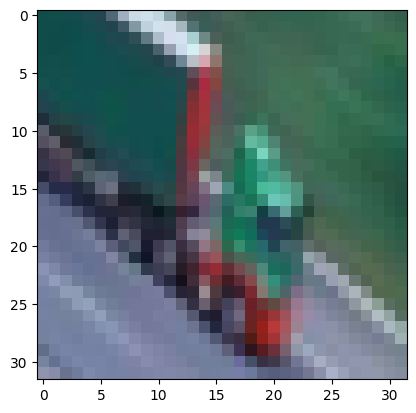

In [ ]:
plt.imshow(image)

In [ ]:
meta_data = load_CIFAR_batch('dataset/batches.meta')
labels = meta_data['label_names']
print("Label Names:", labels )

Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
train_data.shape

(20000, 32, 32, 3)

In [ ]:
rows, columns = 5, 5
# take random image idex id
imageId = np.random.randint(0, len(X_train), rows * columns)
print(imageId)
#take images for above random image ids
images = X_train[imageId]
# take labels for these images only
labels = [Y[i] for i in imageId]
print(labels)

[4677 5476 8804 5116 5920 9577 4759 2030 7970 1346 4316 1460  412 3964
 2103 1859 8739 6484 1636 5622 3219  792 8834 4488 8044]
[2, 9, 4, 7, 5, 2, 0, 7, 0, 5, 5, 5, 7, 0, 7, 8, 3, 2, 5, 9, 4, 3, 4, 6, 0]


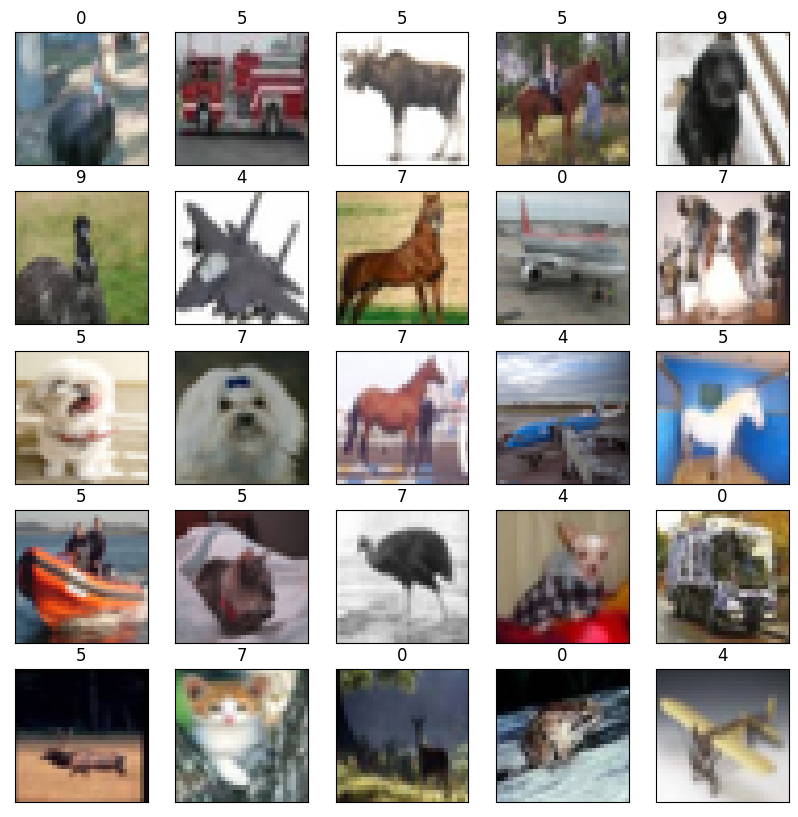

In [ ]:
# define figure
fig=plt.figure(figsize=(10, 10))
# visualize these random images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("{}"
          .format(labels[Y[i-1]]))
plt.show()


PREPROCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(data['data'])

In [ ]:
x_train.shape

(10000, 3072)

In [ ]:
data['data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
pca_data =  pca.fit_transform(x_train)

In [ ]:
pca_data.shape

(10000, 100)

In [ ]:
x_train.shape

(10000, 3072)

In [ ]:
len(Y)

10000

LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA ()
lda_data = lda.fit_transform(x_train,Y)

In [ ]:
lda_data.shape

(10000, 9)

KMEANS

In [ ]:
from sklearn.cluster import KMeans
KM_model = KMeans(n_clusters=10)
kmeanspca_predict = KM_model.fit(pca_data)

#kmeanstsne_predict = KM_model.fit(tsne_data)

In [ ]:
kmeanspca_predict.labels_

array([0, 9, 4, ..., 4, 1, 0])

In [ ]:
km = KMeans(n_clusters=10)
kmeanslda_predict  = km.fit(lda_data)

In [ ]:
kmeanslda_predict.labels_

array([2, 1, 5, ..., 8, 8, 0])

DBSCAN

In [ ]:
pca_m = PCA(n_components = 3)
pca_d = pca_m.fit_transform(x_train)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=1000)
neighbors_fit = neighbors.fit(pca_data)
distances, indices = neighbors_fit.kneighbors(pca_data)


In [ ]:
print("shape of distance matrix ",distances.shape)
for enum , row in enumerate(distances[:2]):
    print("observation"+str(enum)+str([round(x,2) for x in row])+'\n')

shape of distance matrix  (10000, 1000)
observation0[0.0, 30.94, 31.0, 31.21, 31.22, 31.23, 31.45, 32.63, 33.06, 33.31, 33.69, 34.06, 34.13, 34.18, 34.2, 34.23, 34.47, 34.53, 34.53, 34.66, 34.66, 34.89, 35.0, 35.08, 35.08, 35.18, 35.18, 35.24, 35.24, 35.28, 35.39, 35.54, 35.63, 35.66, 35.75, 35.77, 35.8, 35.84, 35.85, 35.88, 35.91, 35.91, 35.94, 36.02, 36.03, 36.07, 36.11, 36.12, 36.13, 36.14, 36.15, 36.18, 36.22, 36.23, 36.24, 36.38, 36.43, 36.53, 36.58, 36.63, 36.65, 36.66, 36.69, 36.71, 36.76, 36.85, 36.92, 36.94, 36.95, 36.95, 36.98, 37.09, 37.1, 37.26, 37.29, 37.29, 37.29, 37.31, 37.41, 37.44, 37.46, 37.49, 37.5, 37.61, 37.65, 37.66, 37.67, 37.68, 37.74, 37.74, 37.75, 37.78, 37.8, 37.91, 37.93, 37.96, 37.99, 38.02, 38.06, 38.08, 38.19, 38.21, 38.23, 38.26, 38.28, 38.31, 38.32, 38.33, 38.34, 38.35, 38.36, 38.36, 38.38, 38.44, 38.45, 38.45, 38.45, 38.54, 38.57, 38.61, 38.61, 38.62, 38.65, 38.67, 38.7, 38.7, 38.73, 38.74, 38.76, 38.8, 38.82, 38.82, 38.83, 38.89, 38.89, 38.91, 38.91, 

In [ ]:
distances[:,-1]

array([46.78043858, 56.11936653, 61.49373201, ..., 59.06724192,
       69.47527011, 48.27194308])

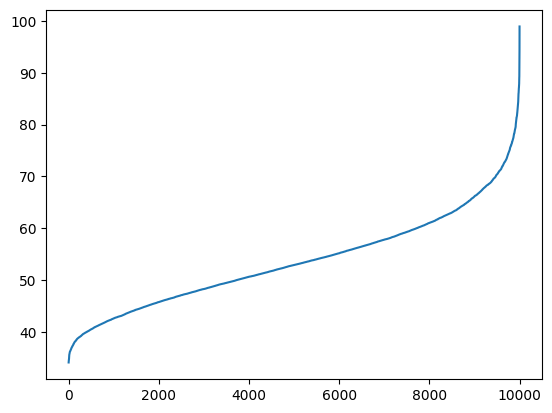

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
#eps la dis max between two points to be considered as neighbors
#min_samples The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
dbscan_model = DBSCAN(eps=70, min_samples=10000)
dbpca_predict = dbscan_model.fit(pca_data)
dblda_predict = dbscan_model.fit(lda_data)
#dbtsne_predict = dbscan_model.fit(tsne_data)

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbpca_predict.labels_)) - (1 if -1 in labels else 0)
n_noise_ = list(dbpca_predict.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 84


In [ ]:
dbpca_predict.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

EVALUATION

In [ ]:
from sklearn.metrics import davies_bouldin_score , silhouette_score
#a minimiser
kmeans_pca = davies_bouldin_score(pca_data,kmeanspca_predict.labels_)
kmeans_lda = davies_bouldin_score(lda_data,kmeanslda_predict.labels_)
print("davies bouldin for pca_kmeans",kmeans_pca)
print("davies bouldin for lda_kmeans",kmeans_lda)
print("davies bouldin for pca_dbscan",db_pca)
print("davies bouldin for lda_dbscan",db_lda)

davies bouldin for pca_kmeans 2.580375148580677
davies bouldin for lda_kmeans 1.6083309995803092
davies bouldin for pca_dbscan 3.7475089805796733


NameError: name 'db_lda' is not defined

In [ ]:
km_pca_score = silhouette_score(pca_data,kmeanspca_predict.labels_)
km_lda_score = silhouette_score(lda_data,kmeanslda_predict.labels_)
print("silhoutte score for pca_kmeans",km_pca_score)
print("silhoutte score for lda_kmeans",km_lda_score)
print("silhoutte score for pca_dbscan",db_pca_score)
print("silhoutte score for lda_dbscan",db_lda_score)

silhoutte score for pca_kmeans 0.058104684011242684
silhoutte score for lda_kmeans 0.16037507164970316
silhoutte score for pca_dbscan 0.3953903468525712


NameError: name 'db_lda_score' is not defined

AFFICHEZ LES IMAGES DE CHAQUE CLUSTER

In [ ]:
def clust_stats(cluster , cpt):
    class_freq = np.zeros(10)
    for i in range(cpt):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)

def clusters_stats(predict, y,cpt):
    stats = np.zeros((cpt,3))
    for i in range(cpt):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i,:] = clust_stats(cluster,cpt)
    return stats

def clusters_purity(clusters_stats):
    majority_sum  = clusters_stats[:,0].sum()
    n = clusters_stats[:,1].sum()
    return majority_sum / n

In [ ]:
def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((32,32,3)), cmap=plt.cm.gray)
    plt.title(label)

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=int(n/25+1)
    n_cols=25
    plt.figure(figsize=(n_cols * 0.9, n_rows * 1.3))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])

def plot_clusters(predict, y, stats,cpt):
    for i in range(cpt):
        indices = np.where(predict == i)
        title = "Most freq item %s, cluster size %d, majority %d, Label %d " % (labels[int(stats[i,2])], stats[i,1], stats[i,0],stats[i,2])
        plot_ds(X_train[indices][:20],title, y[indices])

In [ ]:
db_pca_clusters = len(np.unique(dbpca_predict.labels_))
db_lda_clusters = len(np.unique(dblda_predict.labels_))

In [ ]:
print(kmeanslda_predict.labels_==6)

[False False False ... False False False]


In [ ]:
stats = clusters_stats(kmeanspca_predict.labels_, train_labels,10)
purity = clusters_purity(stats)
stats_km_lda = clusters_stats(kmeanslda_predict.labels_, train_labels,10)
purity_km_lda = clusters_purity(stats_km_lda)

stats_db_pca = clusters_stats(dbpca_predict.labels_, train_labels,db_pca_clusters)
purity_db_pca = clusters_purity(stats_db_pca)
stats_db_lda = clusters_stats(dblda_predict.labels_, train_labels,db_pca_clusters)
purity_db_lda = clusters_purity(stats_db_lda)


print("Plotting an extract of the 10 clusters PCA KMEANS, overall purity: %f" % purity)
print("Plotting an extract of the 10 clusters lda KMEANS, overall purity: %f" % purity_km_lda)
print("Plotting an extract of the clusters lda dbscan, overall purity: %f" % purity_db_pca)
print("Plotting an extract of the clusters lda dbscan, overall purity: %f" % purity_db_lda)

Plotting an extract of the 10 clusters PCA KMEANS, overall purity: 0.222800
Plotting an extract of the 10 clusters lda KMEANS, overall purity: 0.783600
Plotting an extract of the clusters lda dbscan, overall purity: 1.000000
Plotting an extract of the clusters lda dbscan, overall purity: 1.000000


KMEANS_PCA_IMAGES

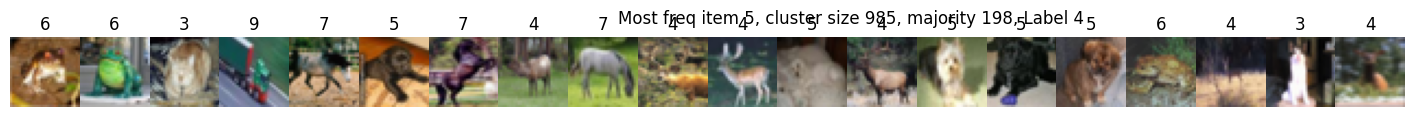

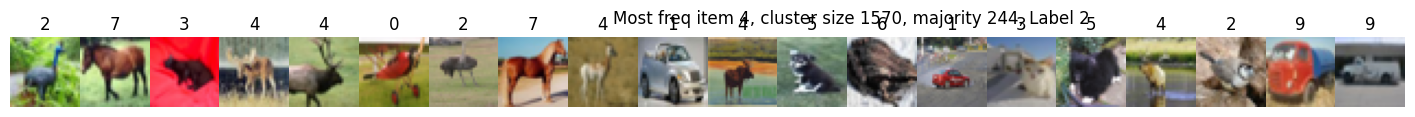

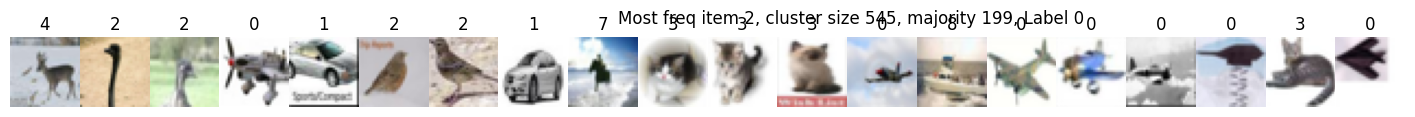

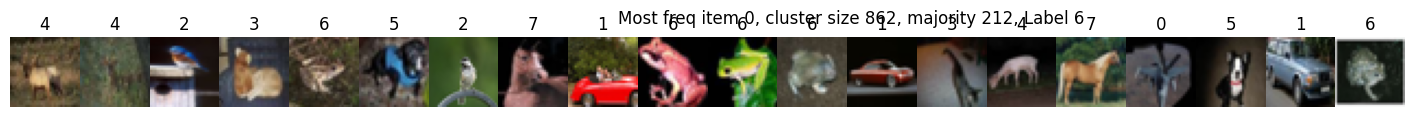

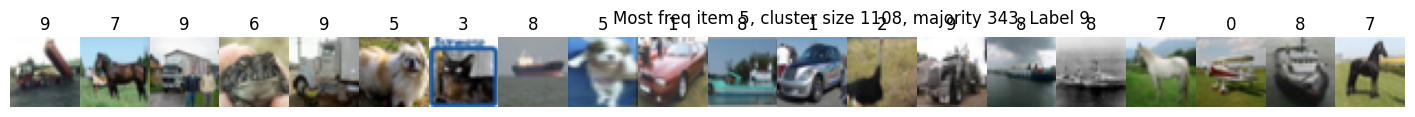

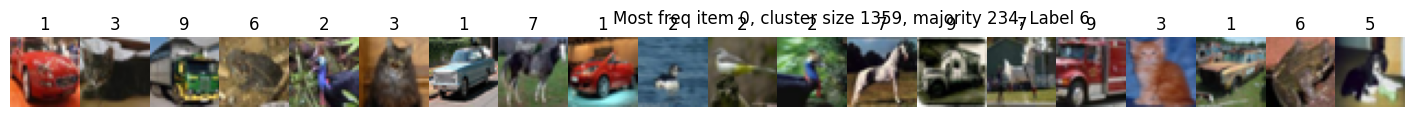

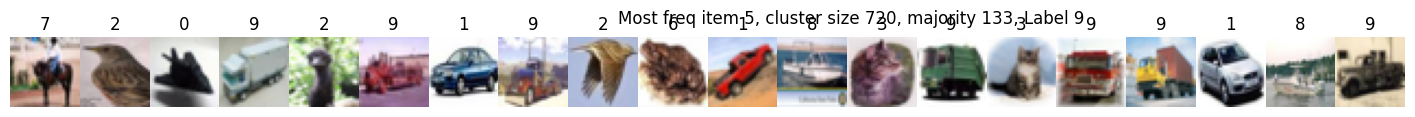

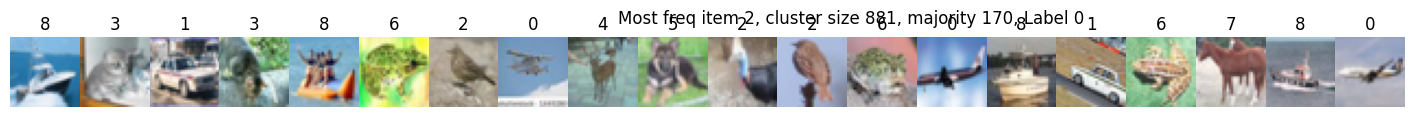

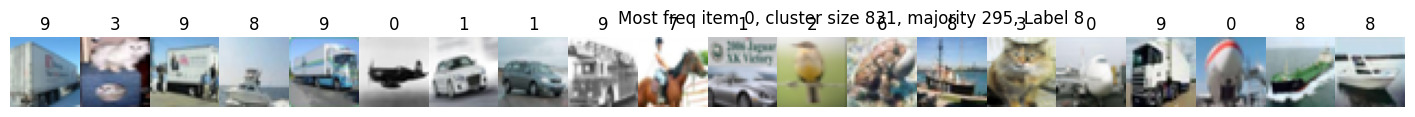

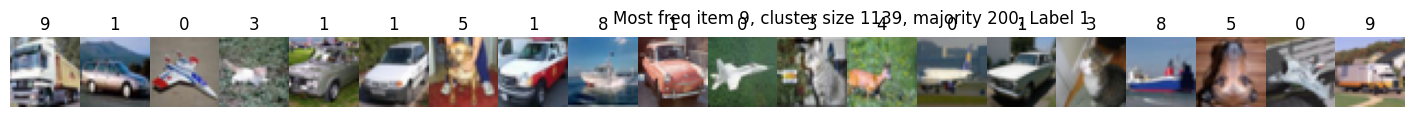

In [ ]:
plot_clusters(kmeanspca_predict.labels_, train_labels, stats,10)

KMEANS_LDA_IMAGES

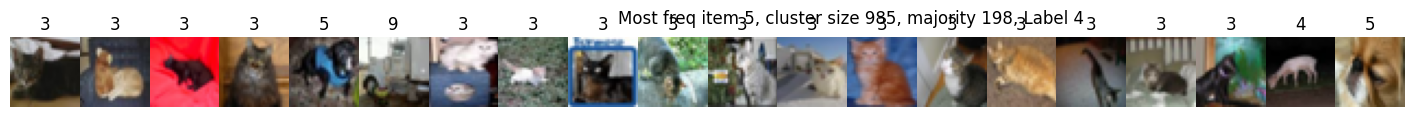

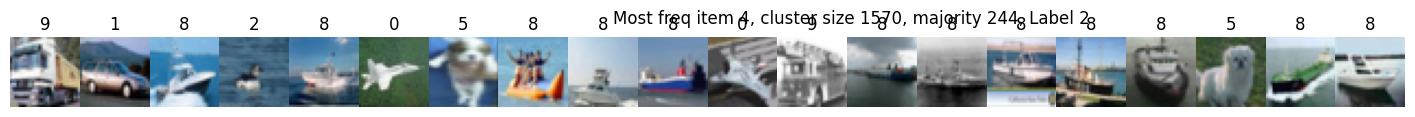

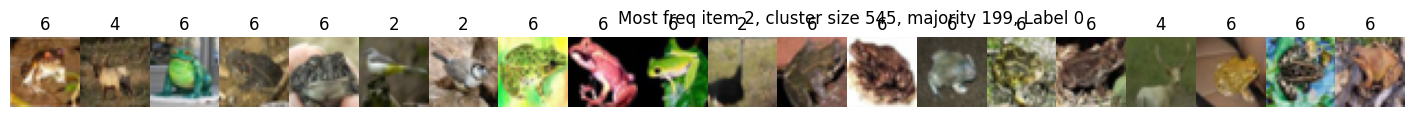

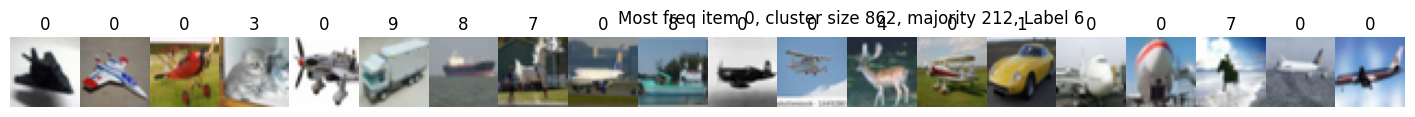

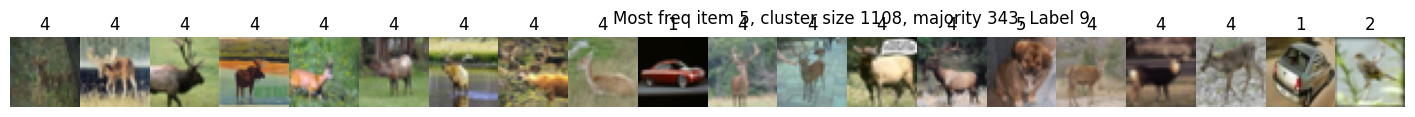

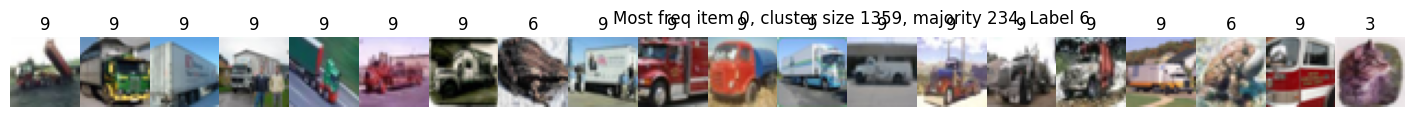

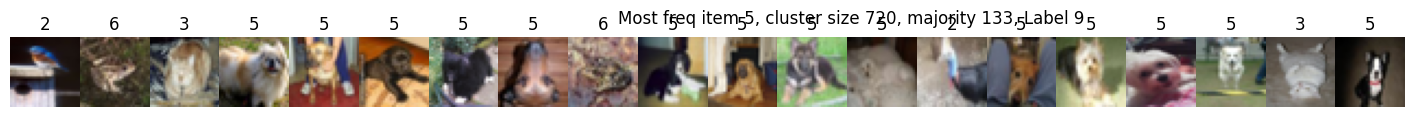

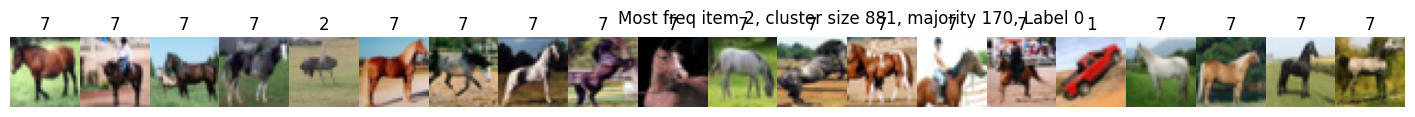

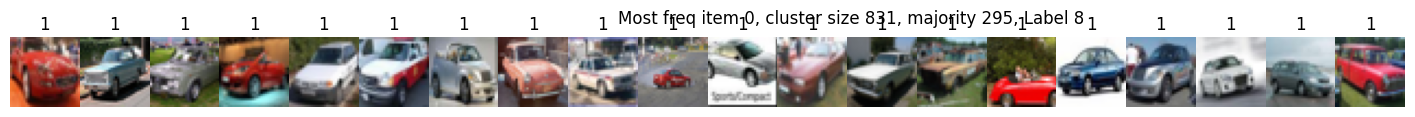

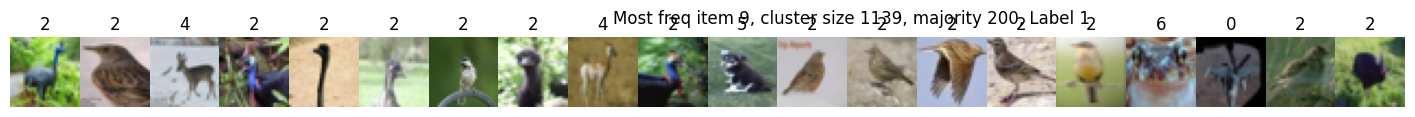

In [ ]:
plot_clusters(kmeanslda_predict.labels_, train_labels, stats,10)

DBSCAN_CLUSTER_IMAGES

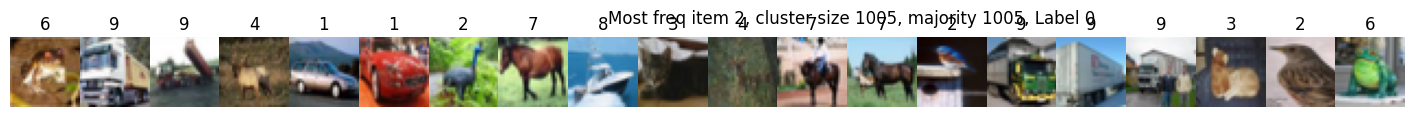

In [ ]:
plot_clusters(dbpca_predict.labels_, train_labels,stats_db_pca,db_pca_clusters )

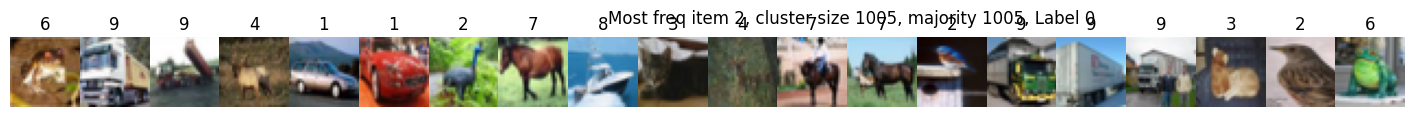

In [ ]:
plot_clusters(dblda_predict.labels_, train_labels,stats_db_lda,db_lda_clusters)

3D VISUALIZATION

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
def ploting_3D(x,y,num_clusters):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    colors = ['red','green','black','blue','pink','yellow','purple','orange','cyan','olive']
    for i in range(num_clusters):
        ax.scatter(x[y==i,0],x[y==i,1],x[y==i,2],s = 50, c = colors[i])

In [ ]:
pca_3d_model = PCA(n_components = 3)
pca_3d_data = pca_3d_model.fit_transform(x_train)

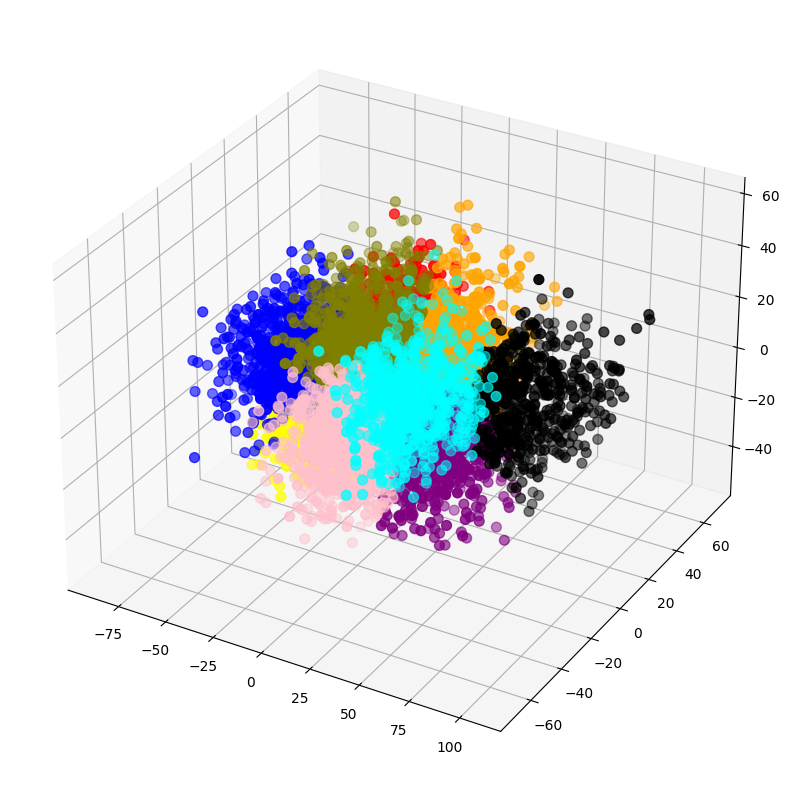

In [ ]:
ploting_3D(pca_3d_data,kmeanspca_predict.labels_,10)

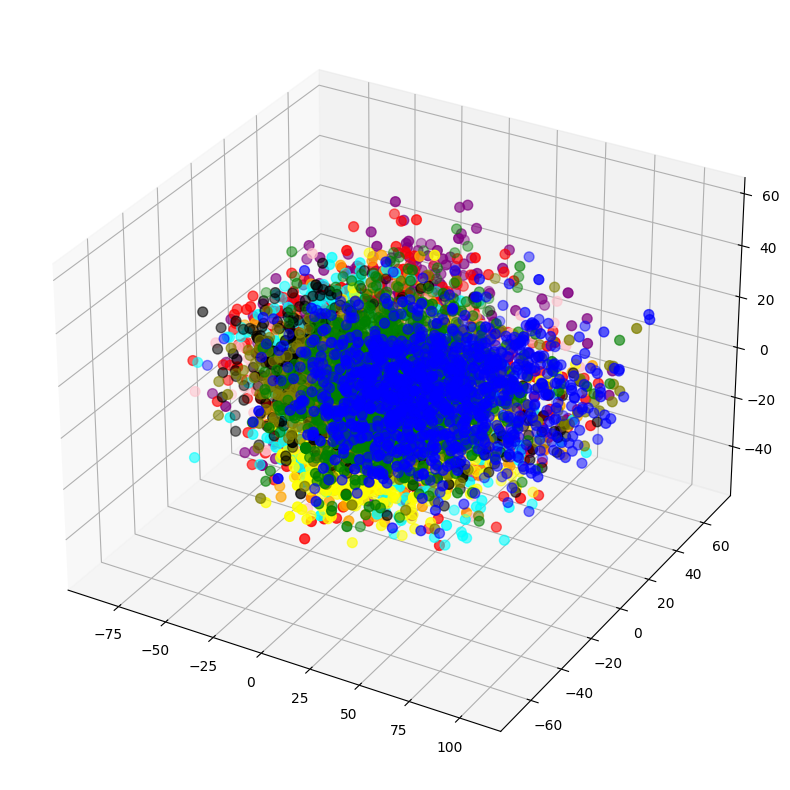

In [ ]:
ploting_3D(pca_3d_data,kmeanslda_predict.labels_,10)

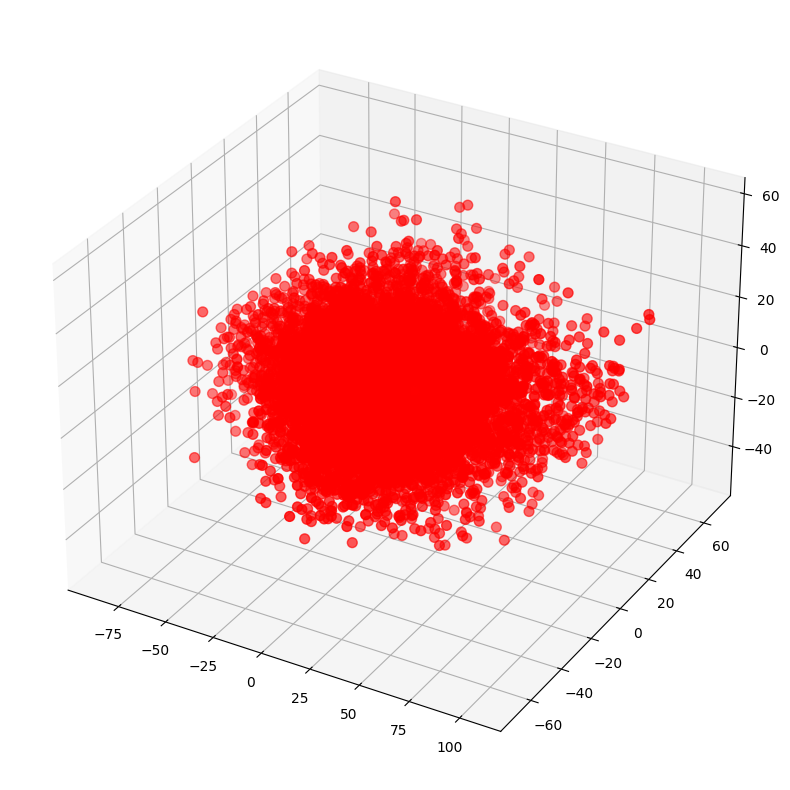

In [ ]:
ploting_3D(pca_3d_data,dblda_predict.labels_,2)

In [ ]:
pca_m = PCA(n_components = 3)
pca_d = pca_m.fit_transform(data['data'])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA ()
lda_data = lda.fit_transform(data['data'],Y)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

nb = NearestNeighbors(n_neighbors=50)
nb_fit = nb.fit(pca_d)
dists, ind = nb_fit.kneighbors(pca_d)

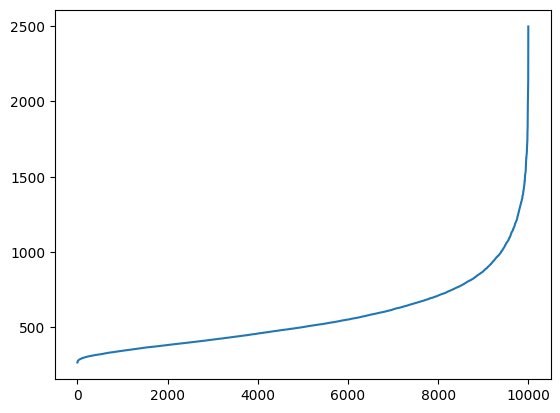

In [ ]:
dists = np.sort(dists, axis=0)
dists = dists[:,-1]
plt.plot(dists)

In [ ]:
# db_mode = DBSCAN(eps=700, min_samples=50)
# dbpca_predict = db_mode.fit(pca_d)
# # dblda_predict = db_mode.fit(lda_data)

In [ ]:
# dbpca_predict.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)